In [12]:
		from IPython.display import HTML

		HTML('''<script>
		code_show=true; 
		function code_toggle() {
		 if (code_show){
		 $('div.input').hide();
		 $('div.output_stderr').hide();
		 } else {
		 $('div.input').show();
		 $('div.output_stderr').show();
		 }
		 code_show = !code_show
		} 
		$( document ).ready(code_toggle);
		</script>
		<form action='javascript:code_toggle()'><input STYLE='color: #4286f4' 
		type='submit' value='Click here to toggle on/off the raw code.'></form>''')

# Atomok gerjesztési potenciálja

# Tartalomjegyzék

- A mérés rövid leírása
- A Frank-Hertz cső
- Mérési eredmények és kiértékelés
- Diszkusszió

## A mérés rövid leírása


A mérés során a Hg és Ne első gerjesztési potneciálját kell meghatározni a Frank-Hertz kísérlet alapján.
Mivel a mérést nem tudtam elvégezni készen megkatam az adatokat Hg és Ne gázra is.

## A Frank-Hertz cső


A cső tulajdonképpen egy olyan trióda, amely egy termikusan fűtött katódból, egy anódból és rácsszerű elektródákból áll.

Az üveg cső belsejében alacsony nyomású gőz található, az egész pedig egy szabályozható hőmérsékletű kályhával van körülvéve. A katódban a fix fűtési feszültséggel elektronok keletkeznek, ezek számát az U1 feszültséggel szabályozhatjuk, majd a két rácsszerű elektróda között egy U2 gyorsítófeszültséggel növeljük energiájukat (eU2), a gőzatomokkal töltött téren keresztül. Az elektronok az Anód és a második fém rács között negatív ellenfeszültségbe ütköznek, amivel elérhető, hogy csak azok az elektronok vegyenek részt az áram folyásában, amelyek energiája nagyobb volt, mint eU3.

## Mérési eredmények és kiértékelés

#### (ebből csak egy kódrészletet mutatok meg)

In [3]:
%pylab inline

from scipy import signal
from scipy.signal import argrelextrema,find_peaks
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


/home/andi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
with open('14.29_Hg.txt') as f:
    U2,I = [],[]
    for line in f: 
        if line[0]!='#':
            U2.append( float(line.split()[0]) )
            I.append( float(line.split()[1]) )
            
def get_max(I,U2): #maximumok es minimuok megkeresesere volt szuksegem
    f = interp1d(U2, I, kind='cubic')
    U2new = arange(U2[0],U2[-1],0.01)
    peaks = argrelextrema(f(U2new), np.greater,order=200) 
    return U2new[peaks]

def get_min(I,U2):
    f = interp1d(U2, I, kind='cubic')
    U2new = arange(U2[0],U2[-1],0.01)
    peaks = argrelextrema(f(U2new), np.less,order=200) 
    return U2new[peaks]

Text(0.5, 1.0, 'Measured points')

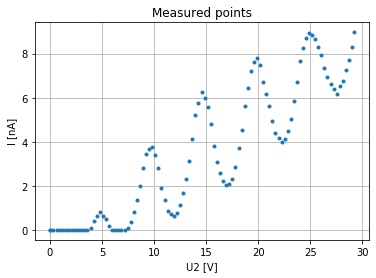

In [11]:
#igy neznek ki a mert adatok

plot(U2,I,'.') 
grid(True)
xlabel('U2 [V]')
ylabel('I [nA]')
title('Measured points')

## Diszkusszió

Mind a Hg, mind pedig a Ne esetében olyan értékeket kaptunk a gerjesztési energiákra, amelyek közel vannak a tényleges értékekhez (rendre 4.9 eV és 16.8 eV). A hullámhosszra kapott eredmények is közel állnak az irodalmi értékekhez, például \textit{Hg} esetében ez $\lambda=254\ nm$ ami kicsivel nagyobb mint a fennebb számolt.